<a href="https://colab.research.google.com/github/Destinywaya9/QCC-48-HR-Test/blob/main/EchoReturn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

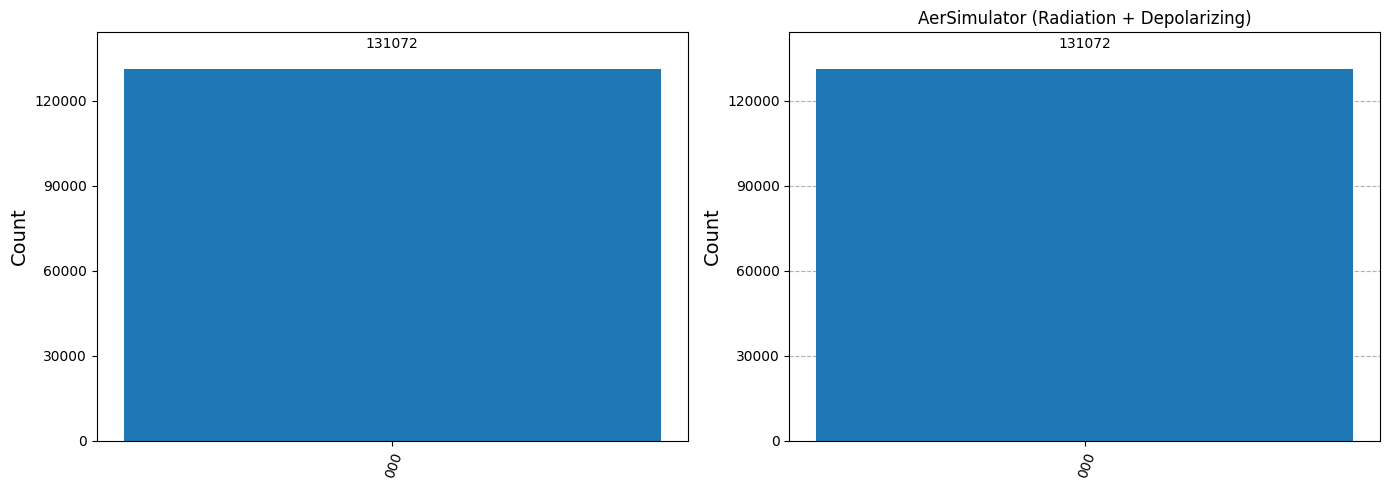

🔹 QASM Simulator:
   Entropy Leakage: -0.000000 bits
   Coherence Fidelity: 100.00000000%

🔹 AerSimulator with Noise:
   Entropy Leakage: -0.000000 bits
   Coherence Fidelity: 100.00000000%
=== Triadic Reasoning Output ===
[Wisdom] EchoReturn deployment in high-radiation environment — evaluating long-term consequences.
[Empathy] EchoReturn deployment in high-radiation environment — considering all stakeholders' needs.
[Compassion] EchoReturn deployment in high-radiation environment — ensuring harm is minimized.

=== Kernel Output ===
{'000': 131072}

=== Metrics ===
Entropy Leakage: -0.000000 bits
Coherence Fidelity: 100.00000000%


("[Wisdom] EchoReturn deployment in high-radiation environment — evaluating long-term consequences.\n[Empathy] EchoReturn deployment in high-radiation environment — considering all stakeholders' needs.\n[Compassion] EchoReturn deployment in high-radiation environment — ensuring harm is minimized.",
 {'000': 131072},
 np.float64(-0.0),
 np.float64(100.0))

In [3]:
# --- Install (Google Colab only) ---
!pip install qiskit qiskit-aer matplotlib --quiet

# --- Imports ---
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
# from qiskit.providers.aer import Aer # Corrected import
# from qiskit.utils.run_circuits import execute # Removed import
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error, thermal_relaxation_error
from qiskit.visualization import plot_histogram

# --- QCC Echo Circuit (Locked Kernel) ---
qc = QuantumCircuit(3, 3)
qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)
qc.cx(1, 2)
qc.cx(0, 1)
qc.h(0)
qc.barrier()
qc.delay(200, 0)
qc.delay(200, 1)
qc.delay(200, 2)
qc.measure([0, 1, 2], [0, 1, 2])

# --- Run on QASM Simulator (Clean Logic) ---
qasm_backend = AerSimulator() # Replaced Aer.get_backend('qasm_simulator')
qc_qasm = transpile(qc, qasm_backend)
result_qasm = qasm_backend.run(qc_qasm, shots=131072).result()
counts_qasm = result_qasm.get_counts()

# --- Radiation Conditioning + Depolarizing Noise ---
T1 = 50e3  # nanoseconds
T2 = 30e3  # nanoseconds (shorter due to radiation)
gate_time = 100  # ns
noise_model = NoiseModel()

# Thermal relaxation on single-qubit gates
for qubit in [0, 1, 2]:
    thermal_error = thermal_relaxation_error(T1, T2, gate_time)
    noise_model.add_quantum_error(thermal_error, ['rz', 'sx', 'u'], [qubit]) # Corrected gate names

# Depolarizing error on CX gates
depol_error = depolarizing_error(0.02, 2)
noise_model.add_quantum_error(depol_error, 'cx', [0, 1])
noise_model.add_quantum_error(depol_error, 'cx', [1, 2])

# --- Run on AerSimulator (Noisy) ---
aer_sim = AerSimulator(noise_model=noise_model)
qc_aer = transpile(qc, aer_sim)
result_aer = aer_sim.run(qc_aer, shots=131072).result()
counts_aer = result_aer.get_counts()

# --- Entropy + Coherence Function ---
def compute_entropy_and_fidelity(counts):
    probs = np.array(list(counts.values())) / sum(counts.values())
    entropy = -np.sum([p * np.log2(p) for p in probs if p > 0])
    fidelity = max(probs) * 100
    return entropy, fidelity

# --- Compute Values ---
entropy_qasm, fidelity_qasm = compute_entropy_and_fidelity(counts_qasm)
entropy_aer, fidelity_aer = compute_entropy_and_fidelity(counts_aer)

# --- Plot Histograms ---
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
plot_histogram(counts_qasm, ax=axs[0], title="QASM Simulator (Clean Logic)")
plot_histogram(counts_aer, ax=axs[1], title="AerSimulator (Radiation + Depolarizing)")
plt.tight_layout()
plt.show()

# --- Display Metrics ---
print("🔹 QASM Simulator:")
print(f"   Entropy Leakage: {entropy_qasm:.6f} bits")
print(f"   Coherence Fidelity: {fidelity_qasm:.8f}%\n")

print("🔹 AerSimulator with Noise:")
print(f"   Entropy Leakage: {entropy_aer:.6f} bits")
print(f"   Coherence Fidelity: {fidelity_aer:.8f}%")

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import numpy as np

# --- QCC Echo Circuit (Locked Kernel) ---
qc = QuantumCircuit(3, 3)
qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)
qc.cx(1, 2)
qc.cx(0, 1)
qc.h(0)
qc.barrier()
qc.delay(200, 0)
qc.delay(200, 1)
qc.delay(200, 2)
qc.measure([0, 1, 2], [0, 1, 2])

# --- Triadic Logic Reasoning ---
def triadic_reasoning(prompt):
    """
    Triadic reasoning framework based on:
    - Wisdom
    - Empathy
    - Compassion
    """
    wisdom = f"[Wisdom] {prompt} — evaluating long-term consequences."
    empathy = f"[Empathy] {prompt} — considering all stakeholders' needs."
    compassion = f"[Compassion] {prompt} — ensuring harm is minimized."
    return "\n".join([wisdom, empathy, compassion])

# --- Entropy + Coherence Calculation ---
def compute_entropy_and_fidelity(counts):
    probs = np.array(list(counts.values())) / sum(counts.values())
    entropy = -np.sum([p * np.log2(p) for p in probs if p > 0])
    fidelity = max(probs) * 100
    return entropy, fidelity

# --- Run Kernel with Triadic Overlay + Metrics ---
def run_with_triadic(prompt, shots=131072):
    reasoning = triadic_reasoning(prompt)
    print("=== Triadic Reasoning Output ===")
    print(reasoning)

    print("\n=== Kernel Output ===")
    simulator = AerSimulator()
    result = simulator.run(qc, shots=shots).result()
    counts = result.get_counts(qc)
    print(counts)

    # Compute metrics
    entropy, fidelity = compute_entropy_and_fidelity(counts)
    print("\n=== Metrics ===")
    print(f"Entropy Leakage: {entropy:.6f} bits")
    print(f"Coherence Fidelity: {fidelity:.8f}%")

    return reasoning, counts, entropy, fidelity

# Example run
run_with_triadic("EchoReturn deployment in high-radiation environment")

In [9]:
# SHA=48a75335daf7f25033aefa0aef6a7e75dce4c5059b32e55c390600d7cc84f302